In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
import pytorch_lightning as pl

In [5]:
import matplotlib.pyplot as plt

In [6]:
import sys

In [7]:
sys.path.append('../../../')

In [8]:
from dltranz.lightning_modules.stream_encoder import *

In [9]:
import logging
logging.getLogger('pytorch_lightning').setLevel(logging.ERROR)

# Run

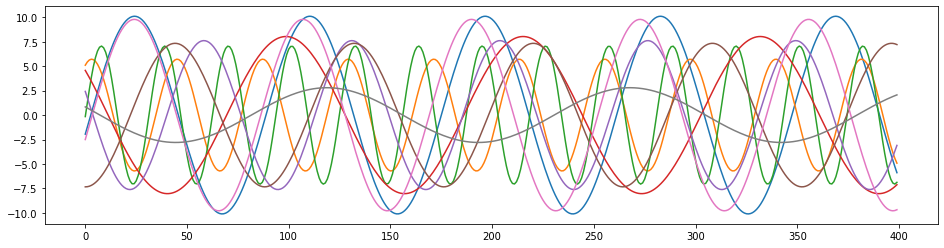

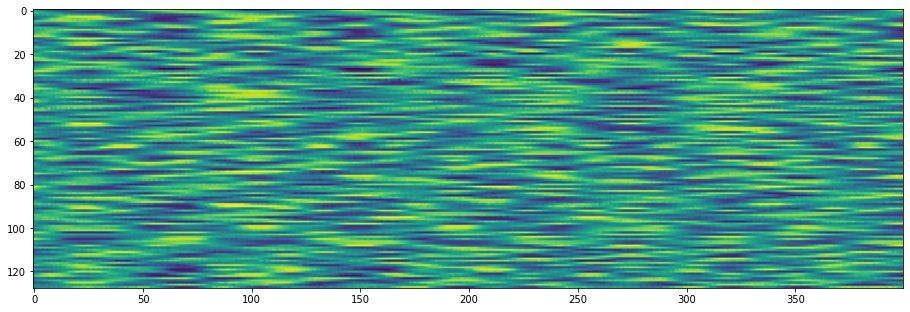

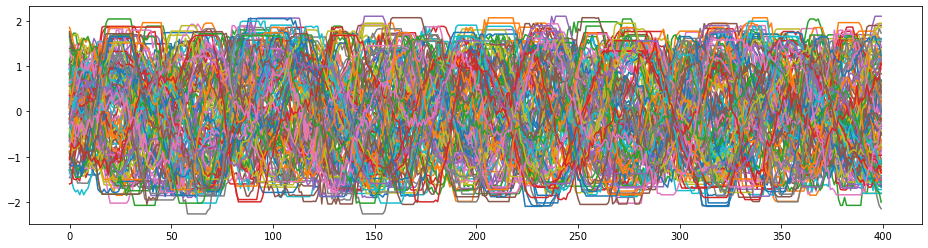

In [10]:
N = 10000
n_dim_in = 8
n_dim_out = 128
data_sin_pos = torch.arange(N).view(-1, 1).repeat(1, n_dim_in)
data_sin_amp = torch.rand(1, n_dim_in) * 10 + 1
data_sin_freq = 2 * np.pi / (torch.rand(1, n_dim_in) * 190 + 10)
data_sin_phase = 2 * np.pi * torch.rand(1, n_dim_in)
data_sin = data_sin_amp * torch.sin(data_sin_freq * data_sin_pos + data_sin_phase)

a = data_sin[:400]
plt.figure(figsize=(16, 4))
plt.plot(a.numpy())
plt.show() 

data_sin = torch.mm(data_sin, torch.randn(n_dim_in, n_dim_out)) + (torch.rand(1, n_dim_out) * 10 - 5)
data_sin += torch.randn_like(data_sin) * 1
data_sin = data_sin.unsqueeze(0)

a = data_sin[0, :400]
plt.figure(figsize=(16, 4))
plt.plot(a.numpy())
plt.show() 

a = np.clip(a, *np.percentile(a, [5, 95], axis=0))
a = a - a.mean(dim=0, keepdims=True)
a = a / a.std(dim=0, keepdims=True)

plt.figure(figsize=(16, 16 * a.size(1) / a.size(0)))
plt.imshow(a.numpy().T)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(a.numpy())
plt.show() 

In [11]:
!rm -r lightning_logs/

In [12]:
# for sin
model = StreamEncoder(
    history_size=28, predict_size=3,
    in_channels=n_dim_out, clip_range=(-2.5, 2.5),
    h_channels=8, p_dropout=0, z_channels=4,
    c_channels=4,
    var_gamma_z=0.5, var_gamma_c=0.2, 
    lr=0.00005, weight_decay=0.0, step_size=10, gamma=0.8,
    cpc_w=0.1, cov_z_w=0.01, var_z_w=0.1, cov_c_w=2.0, var_c_w=0.1,
)

In [13]:
trainer = pl.Trainer(
    gpus=[3],
    max_epochs=100,
    log_every_n_steps=10,
    progress_bar_refresh_rate=50, weights_summary=None,
    logger=pl.loggers.TensorBoardLogger(
        save_dir='lightning_logs/',
        default_hp_metric=False,
    )
)

In [14]:
l3dt = Loader3DTensor(model)
train_dl = l3dt.get_train_dataloader(data_sin, 128, 4)
valid_dl = l3dt.get_valid_dataloader(data_sin, 16, 0)

In [15]:
batch = next(iter(train_dl))[0]

In [16]:
trainer.fit(model, train_dataloader=train_dl, val_dataloaders=valid_dl)

Validation sanity check: 0it [00:00, ?it/s]

/mnt2/kireev/pipenv_envs/pytorch-lifestream-bcSZKFyz/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

# Tuning

In [17]:
def r_exp(b, m):
    a = b / m
    b = b * m
    a = np.log(a)
    b = np.log(b)
    
    return np.exp(np.random.random(1)[0] * (b - a) + a)

In [18]:
for i in range(20):
    mul_c = 100.0
    params = dict(
        lr=r_exp(0.001, mul_c),
        weight_decay=0.0 if np.random.random(1)[0] > 0.5 else r_exp(0.001, mul_c),
        cpc_w=0.1,
        cov_z_w=r_exp(0.1, mul_c),
        var_z_w=r_exp(0.1, mul_c),
        cov_c_w=r_exp(0.1, mul_c),
        var_c_w=r_exp(0.1, mul_c),
        z_channels=np.random.choice([2, 4, 8, 12, 16, 20, 24, 28, 32], 1)[0],
    )
    print(f'[{i:04d}] - start', end='')
    stream_encoder = StreamEncoder(  
        history_size=28, predict_size=3,
        in_channels=n_dim_out, clip_range=(-2.5, 2.5),
        h_channels=params['z_channels'] * 2, p_dropout=0, 
        c_channels=32,
        var_gamma_z=0.5, var_gamma_c=0.2,
        step_size=25, gamma=0.8,
        **params,
    )
    trainer = pl.Trainer(
        gpus=[3],
        max_epochs=100,
        log_every_n_steps=50,
        progress_bar_refresh_rate=0, weights_summary=None,
        logger=pl.loggers.TensorBoardLogger(
            save_dir='lightning_logs/',
            default_hp_metric=False,
        )
    )

    trainer.fit(stream_encoder, train_dataloader=train_dl, val_dataloaders=valid_dl)
    print(' - done')

[0000] - start - done
[0001] - start - done
[0002] - start - done
[0003] - start - done
[0004] - start - done
[0005] - start - done
[0006] - start - done
[0007] - start - done
[0008] - start - done
[0009] - start - done
[0010] - start - done
[0011] - start - done
[0012] - start - done
[0013] - start - done
[0014] - start - done
[0015] - start - done
[0016] - start - done
[0017] - start - done
[0018] - start - done
[0019] - start - done


# Inference

In [44]:
model = StreamEncoder.load_from_checkpoint('lightning_logs/default/version_14/checkpoints/epoch=99-step=7799.ckpt')

In [45]:
print(model.hparams)

"c_channels":   32
"clip_range":   (-2.5, 2.5)
"cov_c_w":      0.5790320386293046
"cov_z_w":      1.5300190384036605
"cpc_w":        0.1
"gamma":        0.8
"h_channels":   24
"history_size": 28
"in_channels":  128
"lr":           0.002839013386654124
"p_dropout":    0
"predict_size": 3
"step_size":    25
"var_c_w":      0.022693242156911923
"var_gamma_c":  0.2
"var_gamma_z":  0.5
"var_z_w":      3.4033609890562353
"weight_decay": 0.0
"z_channels":   12


# Eval

In [46]:
model.eval()

pred_horizon = 1
data_norm, z, c = model(data_sin)
p = model.lin_predictors_c2p[pred_horizon - 1](c)

In [47]:
data_norm, z, c, p = [t[:, :300] for t in [data_norm, z, c, p]]

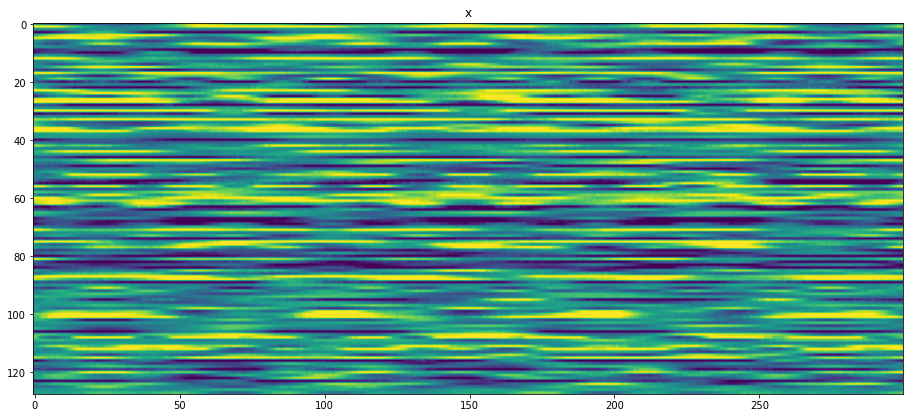

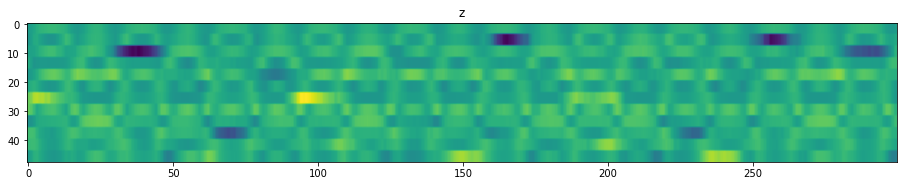

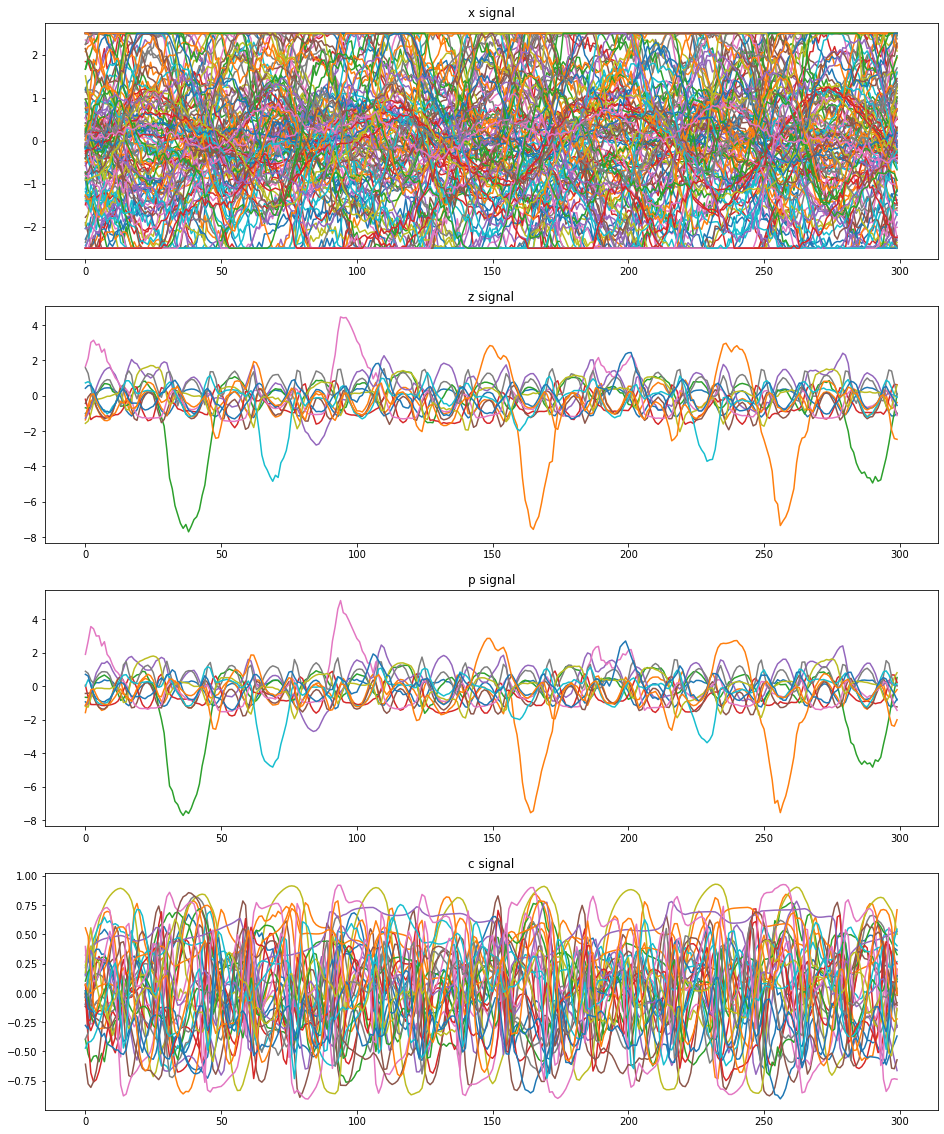

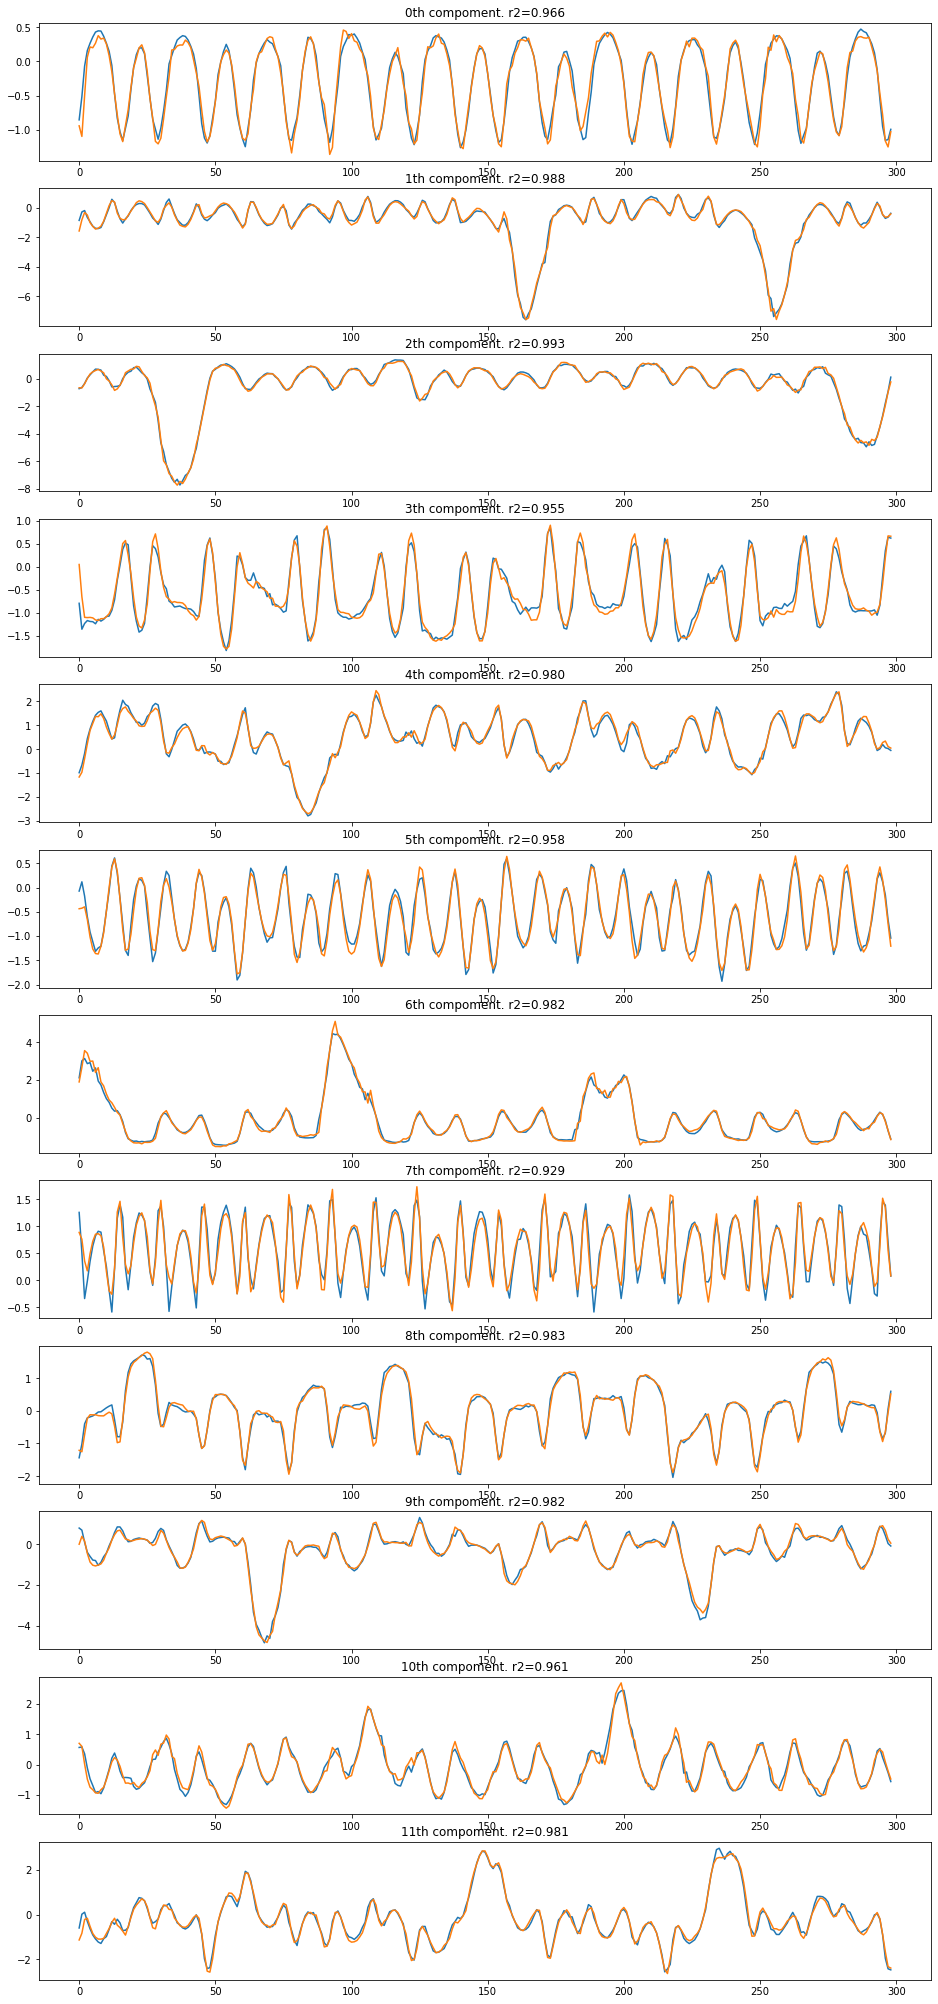

r2_score = 0.972
z_self_corr = 0.141
z_unique_features = 4.685
cpc_pow = 4.552


In [48]:
a = data_norm.unsqueeze(-1).repeat(1, 1, 1, 1).view(*data_norm.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('x')
plt.show()

a = z.unsqueeze(-1).repeat(1, 1, 1, 4).view(*z.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('z')
plt.show()

a = p.unsqueeze(-1).repeat(1, 1, 1, 4).view(*p.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('p')
plt.show()

a = c.unsqueeze(-1).repeat(1, 1, 1, 4).view(*c.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('c')
plt.show()

_, axs = plt.subplots(4, 1, figsize=(16, 5 * 4))
axs[0].plot(data_norm[0].detach().numpy())
axs[0].set_title('x signal')
axs[1].plot(z[0].detach().numpy())
axs[1].set_title('z signal')
axs[2].plot(p[0].detach().numpy())
axs[2].set_title('p signal')
axs[3].plot(c[0].detach().numpy())
axs[3].set_title('c signal')
plt.show()


_, axs = plt.subplots(z.size(2), 1, figsize=(16, 3 * z.size(2)))
for i, ax in zip(range(z.size(2)), axs):
    ax.plot(z[0, pred_horizon:, i].detach().numpy())
    ax.plot(p[0, :-pred_horizon, i].detach().numpy())
    r2_score = 1 - (z[0, pred_horizon:, i] - p[0, :-pred_horizon, i]).pow(2).sum() / \
        ((z[0, pred_horizon:, i] - z[0, pred_horizon:, i].mean(dim=0, keepdim=True)).pow(2).sum() + 1e-6)
    ax.set_title(f'{i}th compoment. r2={r2_score:.3f}')
plt.show()

r2_score = 1 - (z[:, pred_horizon:] - p[:, :-pred_horizon]).pow(2).sum(dim=1) / \
    ((z[:, pred_horizon:] - z[:, pred_horizon:].mean(dim=1, keepdim=True)).pow(2).sum(dim=1) + 1e-6)
print(f'r2_score = {r2_score.mean():.3f}')

_z = (z - z.mean(dim=1, keepdims=True)) / (z.std(dim=1, keepdims=True) + 1e-6)
mc = torch.bmm(_z.transpose(1, 2), _z).abs() / _z.size(1)
C = mc.size(1)
off_diag_ix = (1 - torch.eye(C)).bool().view(-1)
m = mc.view(-1, C * C)[:, off_diag_ix].mean()
print(f'z_self_corr = {m:.3f}')
print(f'z_unique_features = {1 / (mc.mean() + 1e-3):.3f}', )
print(f'cpc_pow = {r2_score.mean() / (mc.mean() + 1e-3):.3f}')